In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### Question 1

In [6]:
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### Question 2

In [7]:
#checking for missing values
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Question 3

In [8]:
#checking for an overview of the data
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Question 4

In [15]:
#Drop the few null rows in Date added, rating and duration columns respectively
netflix_data.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [18]:
#checking if null rows has been dropped
netflix_data[["date_added", "rating", "duration"]].isna().sum()


date_added    0
rating        0
duration      0
dtype: int64

#### Question 5

In [ ]:
#Fill in the null rows in director, cast and country column with (“None Specified”, “None
listed” and “Non Specified “) respectively

In [25]:
netflix_data.fillna(value={"director":"None Specified","cast":"None listed","country":"Non Specified"}, inplace=True)

In [26]:
netflix_data[["director" ,"cast", "country"]]

,director,cast,country
0,Kirsten Johnson,None listed,United States
1,None Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Non Specified
3,None Specified,None listed,Non Specified
4,None Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India
...,...,...,...
8802,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States
8803,None Specified,None listed,Non Specified
8804,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States
8805,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States


#### Question 6


In [27]:
#Recheck for missing values
netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Question 7


In [28]:
#Check the value count for Duration column
netflix_data["duration"].value_counts()

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

#### Question 8

In [38]:
#Check the value count for type column
netflix_data["type"].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

#### Question 9

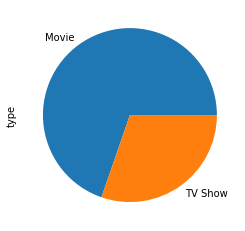

In [39]:
#Using pie chart in matplotlib visualize the type column (Movie and TV Show)
netflix_data["type"].value_counts().plot(kind="pie")
plt.show()

#### Question 10

In [34]:
#) Subset the data to only include Movies in the type Column
netflix_data[netflix_data["type"]=="Movie"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non Specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### Question 11

In [40]:
#Get the counts of directors in the dataset
netflix_data["director"].count()

8790

#### Question 12

<AxesSubplot:>

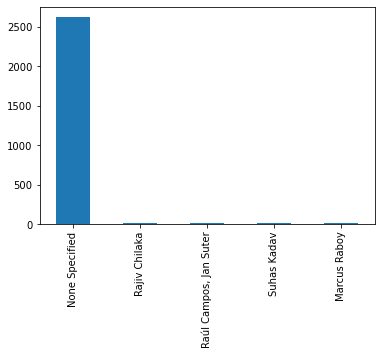

In [43]:
# Visualize the top movies directors
netflix_data["director"].value_counts().head().plot(kind="bar")

In [53]:
netflix_data[netflix_data["type"]=="Movie"]["director"].value_counts().head()

None Specified            187
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               15
Name: director, dtype: int64

In [86]:
#netflix_data.drop(labels="None Specified",inplace=True)

#### Question 13

In [50]:
#) Check for outliers in the duration column
#sns.countplot(data=netflix_data,x="duration")
netflix_data["duration"].value_counts()

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

#### Question 14

In [58]:
#) What are the top countries by movies counts
Top_countries=netflix_data[netflix_data["type"]=="Movie"]["country"].value_counts().head()
Top_countries

United States     2055
India              893
Non Specified      439
United Kingdom     206
Canada             122
Name: country, dtype: int64

#### Question 15

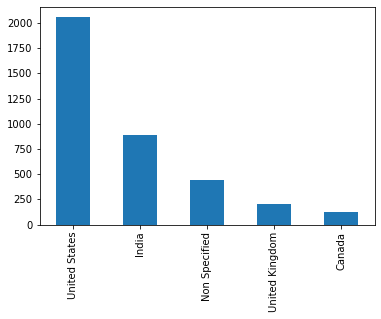

In [63]:
#Visualize the top countries by movie count
Top_countries.plot(kind="bar")
plt.show()

#### Question 16

In [66]:
#Select movies type that are been released in the last 10 year (where years >=2012)
movie_released=netflix_data[(netflix_data["type"]=="Movie")&(netflix_data["release_year"]>=2012)]
movie_released

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non Specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Non Specified,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
...,...,...,...,...,...,...,...,...,...,...,...,...
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art..."
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...


#### Question 17

In [80]:
#) Using bar plot, show the count of movies and series produced in the last 10 years(where years >= 2012)
movie_released["listed_in"].value_counts()
#plt.show()

Documentaries                                           337
Stand-Up Comedy                                         298
Dramas, International Movies                            280
Dramas, Independent Movies, International Movies        217
Comedies, Dramas, International Movies                  200
                                                       ... 
Action & Adventure, Romantic Movies                       1
Sports Movies                                             1
Sci-Fi & Fantasy                                          1
Horror Movies, International Movies, Romantic Movies      1
Comedies, Cult Movies, Independent Movies                 1
Name: listed_in, Length: 216, dtype: int64

In [74]:
(netflix_data["type"]=="Movie")&(netflix_data["release_year"]>=2012)

0        True
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806     True
Length: 8790, dtype: bool

In [76]:
movie_released[["type","release_year"]]

,type,release_year
0,Movie,2020
6,Movie,2021
9,Movie,2021
12,Movie,2021
13,Movie,2021
...,...,...
8788,Movie,2015
8794,Movie,2016
8798,Movie,2014
8801,Movie,2015


#### Question 18

In [82]:
#Using a count plot show the total movies and TV show been released in the last 10 years
y=netflix_data[netflix_data["release_year"]>=2012]

<AxesSubplot:xlabel='type'>

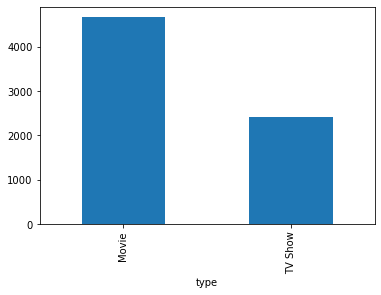

In [85]:
y.groupby("type")["release_year"].count().plot(kind="bar")

#### Question 19

In [71]:
# Check for unique rating
netflix_data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)